In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples=300, centers=2, n_features=2,random_state=0)

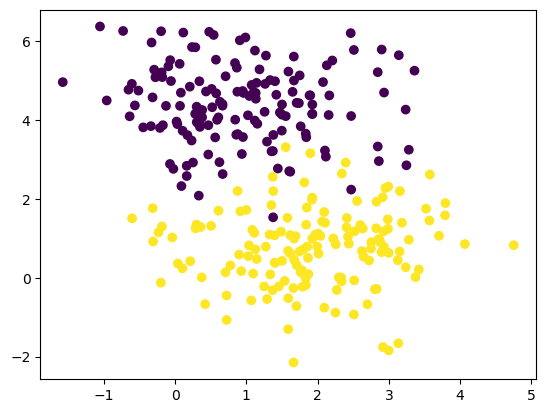

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [4]:
from sklearn.svm import SVC

In [5]:
classifier = SVC(kernel='linear')

In [6]:
classifier.fit(X,Y)

SVC(kernel='linear')

In [7]:
classifier.predict([[3.35941485,  5.24826681],[3.35941485,  5.24826681]])

array([0, 0])

In [8]:
import numpy as np
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

In [9]:
def plot_training_data_with_decision_boundary(kernel, X, y):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    ax = plt.gca()
    # x_min, x_max, y_min, y_max = -10, 10, -10, 10
    # ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    # ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()


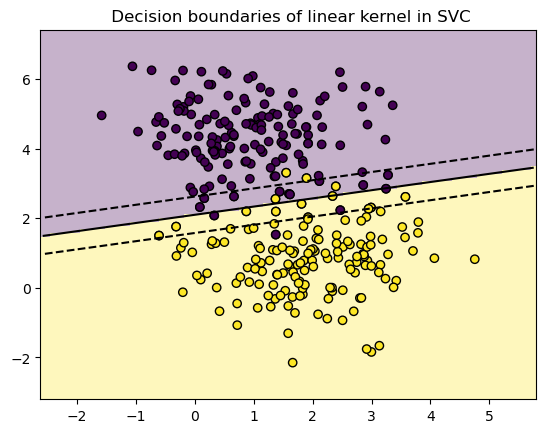

In [10]:
# plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_training_data_with_decision_boundary("linear", X, Y)

In [11]:
from sklearn.datasets import make_circles

In [12]:
X, Y = make_circles(200, factor=.1, noise=.1)

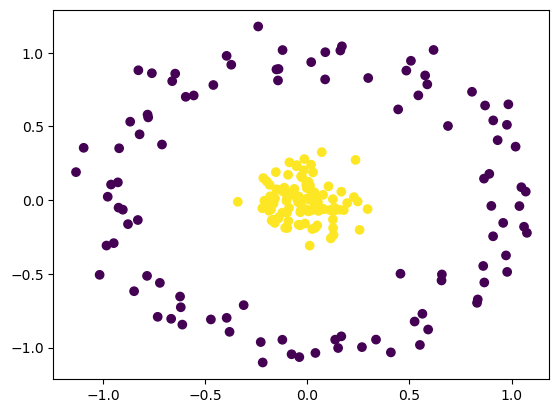

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [14]:
clf = SVC(kernel='rbf')

In [15]:
clf.fit(X,Y)

SVC()

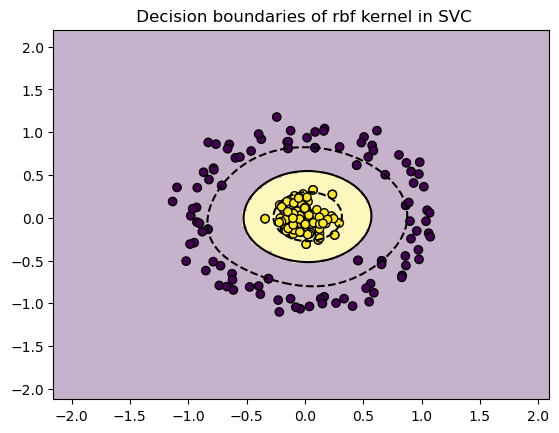

In [16]:
plot_training_data_with_decision_boundary("rbf", X, Y)

In [17]:
from sklearn.datasets import fetch_lfw_people

In [27]:
faces = fetch_lfw_people(min_faces_per_person=40)

In [28]:
faces.target_names
faces.target

array([17, 17,  4, ...,  4, 12,  6])

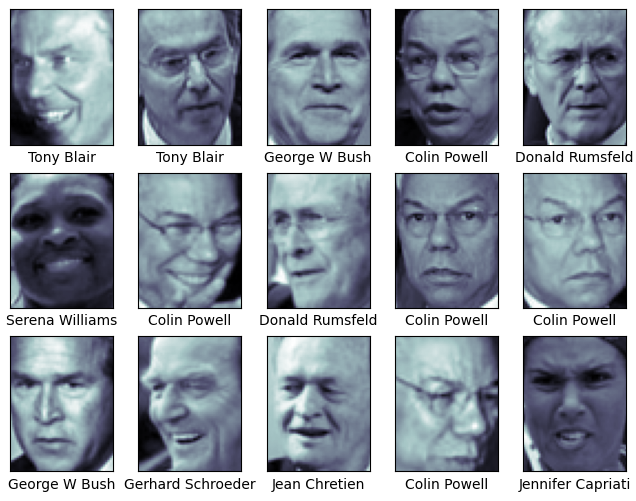

In [29]:
fig, ax = plt.subplots(3, 5, figsize=(8, 6)) 
for i, axi in enumerate(ax.flat):
             axi.imshow(faces.images[i], cmap='bone')
             axi.set(xticks=[], yticks=[],
                     xlabel=faces.target_names[faces.target[i]])

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=150, whiten=True, svd_solver="randomized", random_state=42)

In [32]:
svc = SVC(kernel='rbf', class_weight='balanced')

In [33]:
from sklearn.pipeline import make_pipeline

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
model = make_pipeline(StandardScaler(), pca,svc)

In [36]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(faces.data,faces.target,random_state=42)

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'svc__C':[0.1, 1, 10 ,100],
              'svc__gamma': ['scale', 0.001, 0.01, 0.1, 1],
              'pca__n_components': [50, 100, 200]
             }

In [39]:
grid = GridSearchCV(model, param_grid, verbose=3)

In [40]:
grid.fit(X_Train,Y_Train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END pca__n_components=50, svc__C=0.1, svc__gamma=scale;, score=0.100 total time=   1.1s
[CV 2/5] END pca__n_components=50, svc__C=0.1, svc__gamma=scale;, score=0.086 total time=   0.9s
[CV 3/5] END pca__n_components=50, svc__C=0.1, svc__gamma=scale;, score=0.093 total time=   0.8s
[CV 4/5] END pca__n_components=50, svc__C=0.1, svc__gamma=scale;, score=0.132 total time=   0.9s
[CV 5/5] END pca__n_components=50, svc__C=0.1, svc__gamma=scale;, score=0.118 total time=   0.9s
[CV 1/5] END pca__n_components=50, svc__C=0.1, svc__gamma=0.001;, score=0.046 total time=   0.8s
[CV 2/5] END pca__n_components=50, svc__C=0.1, svc__gamma=0.001;, score=0.025 total time=   0.9s
[CV 3/5] END pca__n_components=50, svc__C=0.1, svc__gamma=0.001;, score=0.050 total time=   0.9s
[CV 4/5] END pca__n_components=50, svc__C=0.1, svc__gamma=0.001;, score=0.050 total time=   0.9s
[CV 5/5] END pca__n_components=50, svc__C=0.1, svc__gamma=0.001;,

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca',
                                        PCA(n_components=150, random_state=42,
                                            svd_solver='randomized',
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'pca__n_components': [50, 100, 200],
                         'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': ['scale', 0.001, 0.01, 0.1, 1]},
             verbose=3)

In [41]:
model = grid.best_estimator_
precit = model.predict(X_Test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy = accuracy_score(Y_Test, precit)

In [44]:
accuracy

0.7494646680942184

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

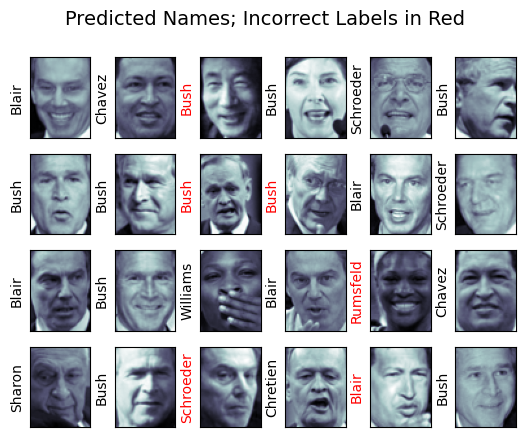

In [45]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
             axi.imshow(X_Test[i].reshape(62, 47), cmap='bone')
             axi.set(xticks=[], yticks=[])
             axi.set_ylabel(faces.target_names[precit[i]].split()[-1],
color='black' if precit[i] == Y_Test[i] else 'red') 
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(Y_Test, precit, target_names = faces.target_names))

                           precision    recall  f1-score   support

             Ariel Sharon       0.85      0.69      0.76        16
    Arnold Schwarzenegger       0.62      0.33      0.43        15
             Colin Powell       0.80      0.85      0.83        61
          Donald Rumsfeld       0.80      0.71      0.75        34
            George W Bush       0.71      0.96      0.82       135
        Gerhard Schroeder       0.50      0.39      0.44        23
  Gloria Macapagal Arroyo       0.89      0.73      0.80        11
              Hugo Chavez       0.83      0.56      0.67        18
           Jacques Chirac       0.83      0.45      0.59        11
            Jean Chretien       0.79      0.79      0.79        14
        Jennifer Capriati       1.00      0.56      0.71         9
            John Ashcroft       0.82      0.69      0.75        13
        Junichiro Koizumi       1.00      0.75      0.86        16
               Laura Bush       0.90      0.82      0.86     

In [48]:
grid.best_params_

{'pca__n_components': 50, 'svc__C': 10, 'svc__gamma': 'scale'}

In [49]:
from sklearn.metrics import confusion_matrix

Text(113.92222222222219, 0.5, 'predicted label')

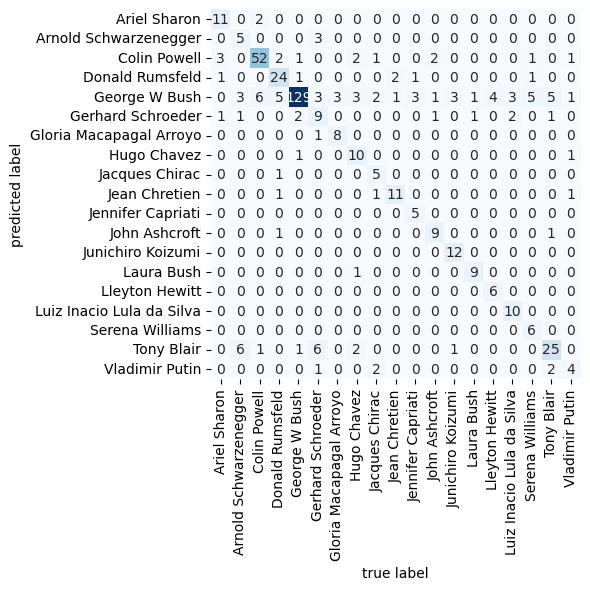

In [50]:
import seaborn as sns
mat = confusion_matrix(Y_Test, precit) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
cbar=False, cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [51]:
pca = PCA(n_components=50, whiten=True, svd_solver="randomized", random_state=42)

In [52]:
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma='scale')

In [53]:
model = make_pipeline(StandardScaler(), pca,svc)

In [54]:
faces = fetch_lfw_people(min_faces_per_person=70)

In [55]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [56]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(faces.data,faces.target,random_state=42)

In [57]:
model.fit(X_Train,Y_Train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca',
                 PCA(n_components=50, random_state=42, svd_solver='randomized',
                     whiten=True)),
                ('svc', SVC(C=10, class_weight='balanced'))])

In [58]:
precit = model.predict(X_Test)

In [59]:
accuracy_score(Y_Test, precit)

0.8385093167701864

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

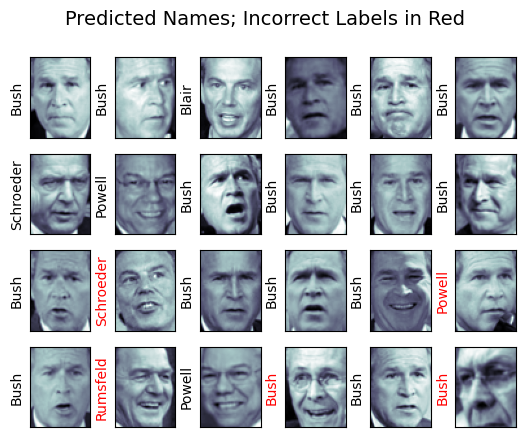

In [60]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
             axi.imshow(X_Test[i].reshape(62, 47), cmap='bone')
             axi.set(xticks=[], yticks=[])
             axi.set_ylabel(faces.target_names[precit[i]].split()[-1],
color='black' if precit[i] == Y_Test[i] else 'red') 
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [61]:
print(classification_report(Y_Test, precit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.90      0.69      0.78        13
     Colin Powell       0.82      0.90      0.86        60
  Donald Rumsfeld       0.80      0.59      0.68        27
    George W Bush       0.83      0.95      0.88       146
Gerhard Schroeder       0.77      0.68      0.72        25
      Hugo Chavez       1.00      0.60      0.75        15
       Tony Blair       0.96      0.75      0.84        36

         accuracy                           0.84       322
        macro avg       0.87      0.74      0.79       322
     weighted avg       0.84      0.84      0.83       322



Text(113.92222222222219, 0.5, 'predicted label')

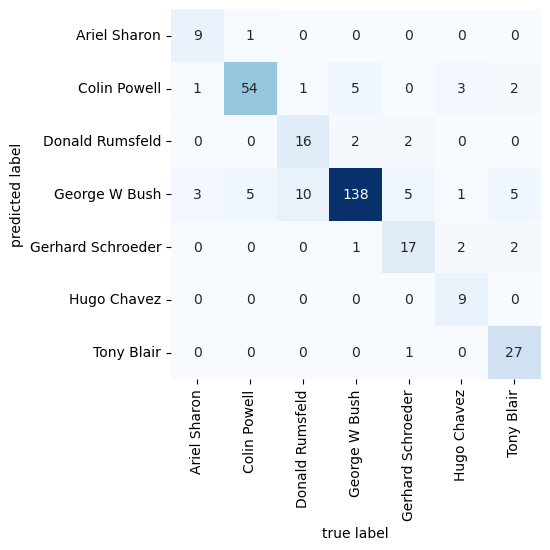

In [62]:
import seaborn as sns
mat = confusion_matrix(Y_Test, precit) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
cbar=False, cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [63]:
# Smaller number of people, better model accuracy
# Even if large number of people, if each person has more sample
# More sample for each person, more accuracy

In [64]:
faces.data[0]

array([0.9973857 , 0.9973857 , 0.99607843, ..., 0.38431373, 0.3869281 ,
       0.3803922 ], dtype=float32)

In [65]:
#? Web Interface, Upload image
# Preprocessing (3D, RGB value of image, transfer 1D array)
# Web server, import trained model, AWS serverless function 
# Main web server, make request (sending image)
# Get response 4 (Bush)
# Show result to client
# $1 per image
# MLOP, Machine Learning Operation, DevOps + Machine Learning

In [66]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [67]:
faces.target

array([5, 6, 3, ..., 5, 3, 5])

In [68]:
faces.data

array([[0.9973857 , 0.9973857 , 0.99607843, ..., 0.38431373, 0.3869281 ,
        0.3803922 ],
       [0.14509805, 0.1633987 , 0.21437909, ..., 0.44575164, 0.4509804 ,
        0.58300656],
       [0.34379086, 0.3503268 , 0.4366013 , ..., 0.7163399 , 0.7202614 ,
        0.7176471 ],
       ...,
       [0.35947713, 0.34901962, 0.32026145, ..., 0.21699347, 0.21568628,
        0.17777778],
       [0.19346406, 0.21176471, 0.2901961 , ..., 0.6862745 , 0.654902  ,
        0.5908497 ],
       [0.12287582, 0.09803922, 0.10980392, ..., 0.12941177, 0.1633987 ,
        0.29150328]], dtype=float32)

In [69]:
# The most tiring and boring part is collect data, and labelling data, supervised learning